
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,ACHC,Acadia Healthcare,US Stocks:Healthcare,70.08,102.67,127.46,17.97,1.46,27.05,15.59,48.60,17.97,0.37
1,ACIW,ACI Worldwide,US Stocks:Technology,85.87,9.07,40.96,16.31,13.14,20.56,9.83,31.35,16.31,0.52
2,ADNT,Adient plc,US Stocks:Consumer Discretionary,291.38,273.10,167.58,-0.58,-0.58,47.61,23.17,91.98,-0.58,-53.35
3,ATGE,Adtalem Global Education,US Stocks:Consumer Discretionary,214.35,-16.14,5.51,-8.39,18.72,46.49,17.36,39.78,-8.39,-333.75
4,ACM,AECOM,US Stocks:Industrials,-46.67,52.10,46.55,24.50,15.08,18.42,13.69,36.50,24.50,0.67
5,AMG,Affiliated Managers Group,US Stocks:Financials,-23.16,96.41,115.94,1.31,-0.25,31.73,23.60,37.78,1.31,0.03
6,ADS,Alliance Data Systems Corp,US Stocks:Technology,-31.43,69.54,119.31,-16.40,-10.92,41.55,24.20,67.60,-16.40,-1108.64
7,ACC,American Campus Communities,US Stocks:Real Estate,145.14,84.12,33.80,9.85,5.10,21.40,9.81,30.98,9.85,0.32
8,AEO,American Eagle Outfitters,US Stocks:Consumer Discretionary,-54.39,98.70,176.80,15.84,19.71,48.34,28.35,46.59,15.84,0.34
9,AFG,American Financial Group,US Stocks:Financials,293.31,138.07,123.29,13.03,18.95,16.06,6.50,28.94,13.03,0.45


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
384,WTRG,Essential Utilities,US Stocks:Utilities,61.04,55.62,8.71,13.74,10.02,14.96,10.40,20.07,13.74,0.68
191,LSCC,Lattice Semiconductor,US Stocks:Technology,195.59,157.44,96.20,108.07,55.11,49.29,31.15,47.30,108.07,2.28
202,LSI,Life Storage Inc,US Stocks:Real Estate,225.25,157.05,58.78,22.62,12.08,15.10,6.51,17.75,22.62,1.27
291,RPM,RPM International Inc,US Stocks:Materials,-25.70,69.78,24.76,26.53,15.93,17.08,10.79,24.49,26.53,1.08
352,TREX,"Trex Company, Inc.",US Stocks:Industrials,-72.79,44.29,69.15,48.31,54.97,35.05,24.89,39.66,48.31,1.22
277,PGNY,Progyny Inc,US Stocks:Healthcare,657.89,345.18,156.82,156.82,156.82,43.10,17.33,65.43,156.82,2.40
184,KNSL,"Kinsale Capital Group, Inc.",US Stocks:Financials,-38.33,-3.60,4.47,44.30,44.30,27.65,19.46,38.27,44.30,1.16
165,INT,World Fuel Services Corp,US Stocks:Energy,63.00,-13.35,23.91,17.87,-4.98,41.33,20.13,46.72,17.87,0.38
87,DAR,Darling Ingredients,US Stocks:Consumer Staples,20.10,-8.27,186.58,56.62,35.59,42.87,25.64,35.12,56.62,1.61
394,YETI,Yeti Holdings,US Stocks:Consumer Discretionary,0.14,204.70,150.68,150.68,150.68,39.29,25.93,62.88,150.68,2.40


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,WTRG,LSCC,LSI,RPM,TREX,PGNY,KNSL,INT,DAR,YETI,CABO,Ranked Portfolio
Annual Returns,13.74,108.07,22.62,26.53,48.31,156.82,44.30,17.87,56.62,150.68,40.42,49.44
Std Dev,20.07,47.30,17.75,24.49,39.66,65.43,38.27,46.72,35.12,62.88,25.15,25.93
Sharpe Ratio,0.68,2.28,1.27,1.08,1.22,2.40,1.16,0.38,1.61,2.40,1.61,1.91
Weight,0.13,0.04,0.21,0.13,0.06,0.08,0.07,0.07,0.05,0.05,0.11,1.00
Worst Typical Down Year,-26.40,13.47,-12.88,-22.45,-31.01,25.96,-32.24,-75.57,-13.62,24.92,-9.88,-2.41
Black Swan,-46.47,-33.83,-30.63,-46.94,-70.67,-39.47,-70.51,-122.29,-48.74,-37.96,-35.03,-28.34


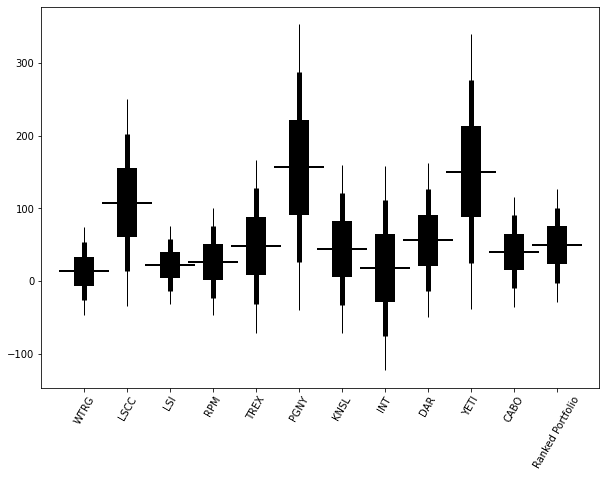

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

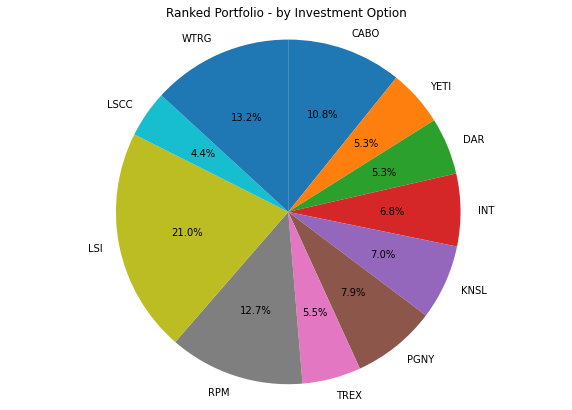

CABO   0.11
YETI   0.05
DAR    0.05
INT    0.07
KNSL   0.07
PGNY   0.08
TREX   0.06
RPM    0.13
LSI    0.21
LSCC   0.04
WTRG   0.13



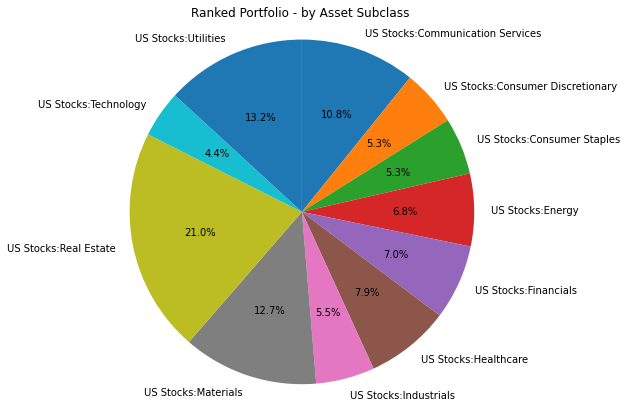

US Stocks:Communication Services   0.11
US Stocks:Consumer Discretionary   0.05
US Stocks:Consumer Staples         0.05
US Stocks:Energy                   0.07
US Stocks:Financials               0.07
US Stocks:Healthcare               0.08
US Stocks:Industrials              0.06
US Stocks:Materials                0.13
US Stocks:Real Estate              0.21
US Stocks:Technology               0.04
US Stocks:Utilities                0.13



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    WTRG                           0.1318
    LSCC                           0.0440
    LSI                            0.2105
    RPM                            0.1270
    TREX                           0.0551
    PGNY                           0.0791
    KNSL                           0.0704
    INT                            0.0681
    DAR                            0.0534
    YETI                           0.0528
    CABO                           0.1079


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer..............

Ranked Portfolio Metrics:           
    max_sharpe_ratio            2.59
    annual_return             130.17
    std_dev                    50.19
    worst typical down year    29.80
    black_swan                -20.39


Ranked Portfolio Weights:
    WTRG                           0.0300
    LSCC                           0.0000
    LSI                            0.0300
    RPM                            0.0400
    TREX                           0.0000
    PGNY                           0.3800
    KNSL                           0.0000
    INT                            0.0000
    DAR                            0.0000
    YETI                           0.4300
    CABO                           0.0900



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).